In [1]:
import json

import networkx as nx
import matplotlib.pyplot as plt

In [2]:
with open("awards-2018-candidate.json", "r") as f:
    candidates = json.load(f) 

Some awards have the same name, but different ids.
Aggregate them for simplicity.

In [3]:
from itertools import chain, groupby

awards = []
authors = []

for award_group in groupby(
    sorted(candidates, key=lambda a: a["project_title"]), 
    key = lambda a: a["project_title"],
):
    title, gourp = award_group
    award_authors = list(chain.from_iterable(map(lambda a: a["principal_investigators"], gourp)))
    awards.append(award_group[0])
    authors.append(award_authors)

In [4]:
G = nx.Graph()

existing_author = set()
award_strings = []
for i, (award, author) in enumerate(zip(awards, authors)):
    award_strings.append(f"{i}: {award}")
    G.add_node(i, color="red", label=award)
    for a in author:
        if a not in existing_author:
            existing_author.add(a)
            G.add_node(a, color="blue", label=a)
        G.add_edge(i, a)

In [5]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

legend_elements = [
    Line2D([0], [0], 
           marker="o", 
           color='w', 
           label='Award',
           markerfacecolor='r',
           markersize=30
    ),
    Line2D([0], [0], 
           marker='o', 
           color='w', 
           label='Author',
           markerfacecolor='b', 
           markersize=30
    ),
]

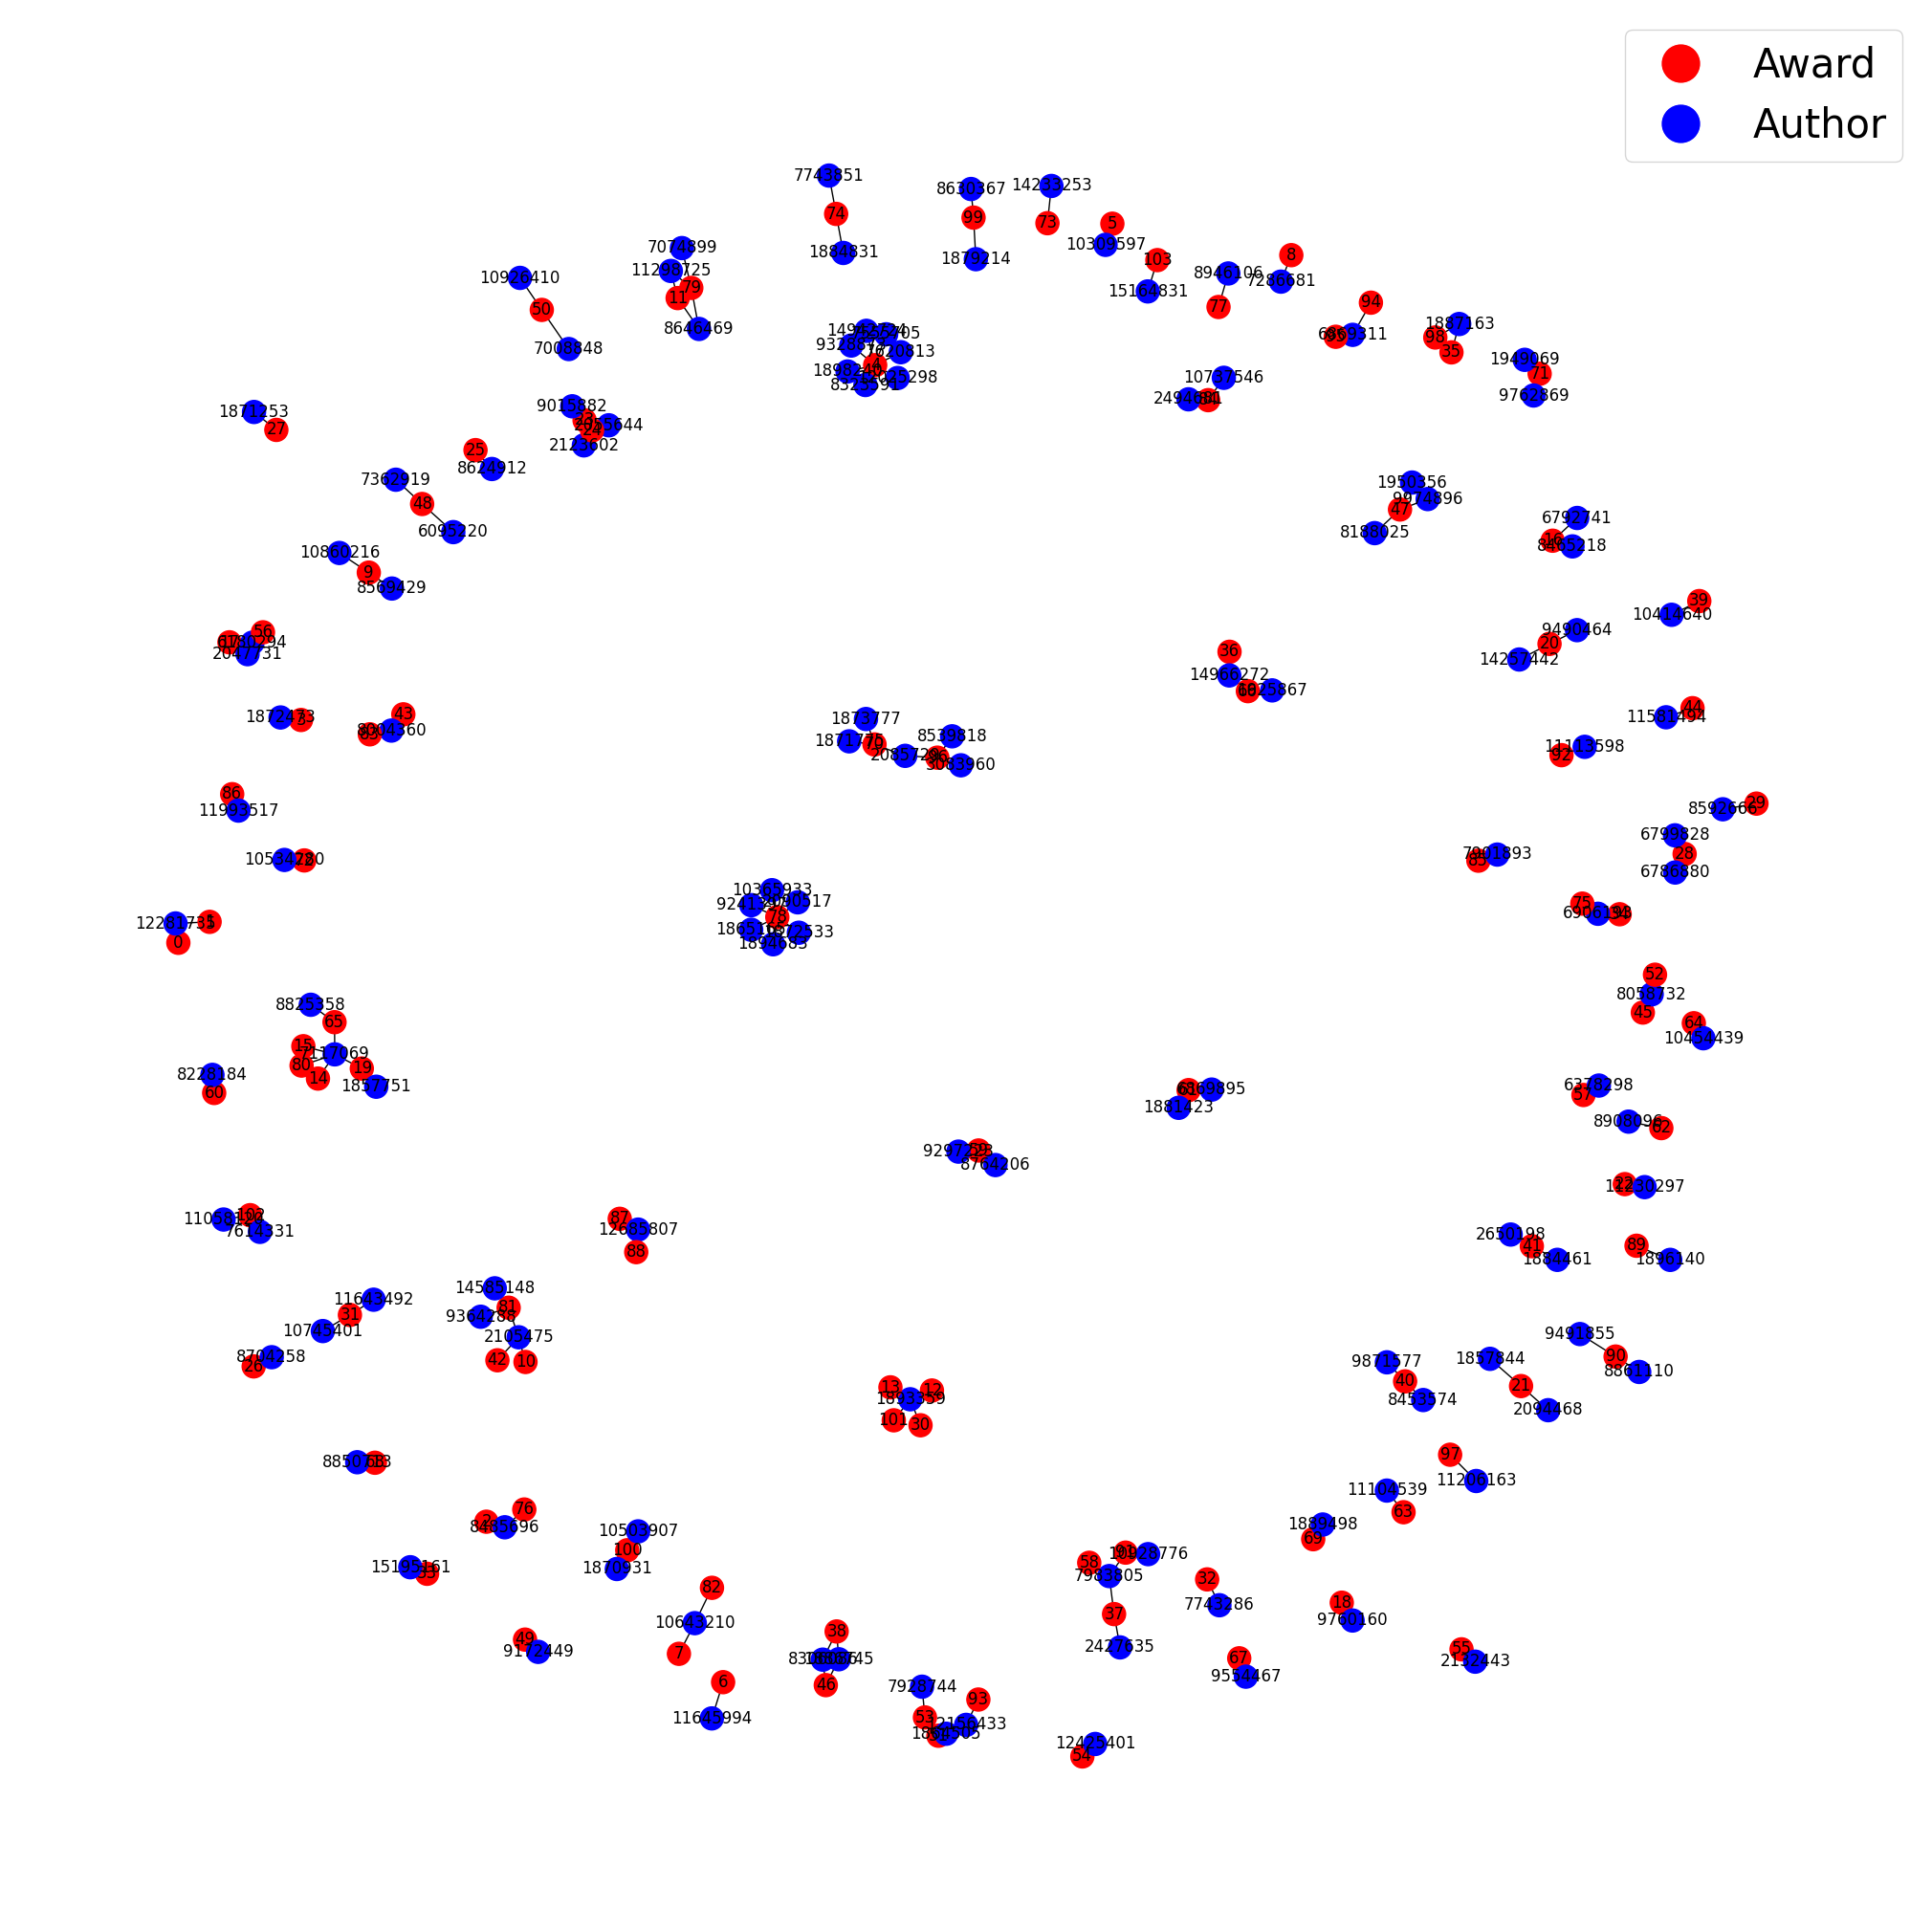

In [6]:
plt.figure(figsize=(20,20))
colors = nx.get_node_attributes(G, 'color').values()
nx.draw(G, with_labels = True, node_color=colors)
plt.legend(
    handles=legend_elements,
    loc='upper right',
    fontsize=30,
)

In [7]:
award_strings

['0: 2018 AUA BASIC SCIENCES SYMPOSIUM: UNDERSTANDING INFERTILITY AND DISORDERS AND DIFFERENCES IN SEXUAL DEVELOPMENT',
 '1: 2018 American Urological Association (AUA) Early-Career Investigators Workshop',
 '2: 2018 Lasers in Micro, Nano and Bio Systems Gordon Research Conference',
 '3: 4th International Conference on UV and Skin Cancer Prevention',
 '4: A Brain Circuit Program for Understanding the Sensorimotor Basis of Behavior',
 '5: A Circuit Approach to Mechanisms and Predictors of Topiramate Response',
 '6: A Machine Learning Alternative to Beamforming to Improve Ultrasound Image Quality for Interventional Access to the Kidney',
 '7: A Machine Learning Approach to Classifying Time Since Stroke using Medical Imaging',
 '8: A fully biological platform for monitoring mesoscale neural activity',
 '9: A high-throughput sequencing and imaging approach to understand the functional basis of olfaction',
 '10: Acquisition of a Confocal  Fluorescence Microscope to Image Synthetic Biomolecul